Smoothing spline interpolation
=========================

[Documentated here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html)

[Download from](https://github.com/kpenev/REUpython/raw/master/Smoothing%20Spline%20Interpolation%20And%20Basic%20Plotting.ipynb)

In [1]:
from matplotlib import pyplot
import scipy

def create_interp_data(frequencies, amplitudes, eval_points):
    """
    Create data to demonstrate smoothing spline interpolation.
    
    The data returned evaluates a sum of sin functions of different frequencies
    and amplitudes at specified locations.
    
    Args:
        frequencies:    The frequencies to include.
        
        amplitudes:    The amplitudes for each frequency
        
        eval_points:    The points at which to evaluate the function.
        
    Returns:
        float array:
            The values of the function at the evaluation points.
    """
    
    assert len(frequencies) == len(amplitudes)
    
    result = scipy.zeros(eval_points.shape)
    for freq, amp in zip(frequencies, amplitudes):
        result += amp * scipy.sin(freq * eval_points)
        
    return result

Let's have a look
==============

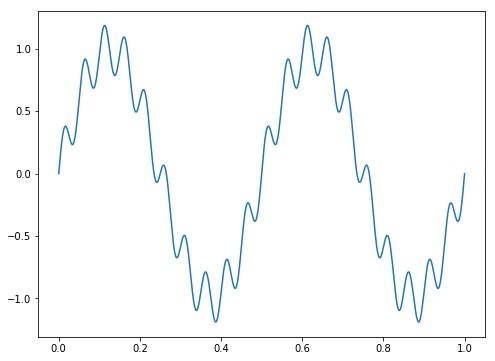

In [4]:
x = scipy.linspace(0.0, 1.0, 1000)
y = create_interp_data([4 * scipy.pi, 40 * scipy.pi], [1.0, 0.2], x)
pyplot.plot(x, y);

In [5]:
from IPython.core.display import display, HTML
from matplotlib import pyplot, rcParams

display(HTML("<style>.container { width:108ch !important; }</style>"))
rcParams['figure.figsize'] = (8, 6)

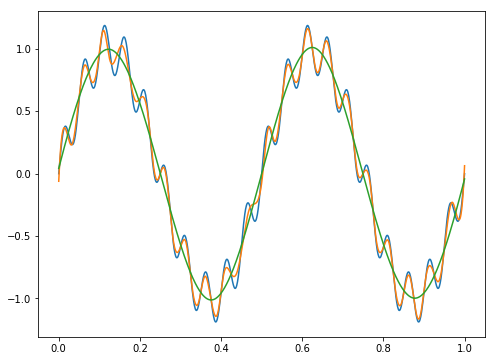

In [6]:
from scipy.interpolate import UnivariateSpline

crude_interpolation = UnivariateSpline(x, y, s=0.02 * len(x))
fine_interpolation = UnivariateSpline(x, y, s=0.002 * len(x))
pyplot.plot(x, y)
pyplot.plot(x, fine_interpolation(x))
pyplot.plot(x, crude_interpolation(x));

Make it more visible
================

[Look at plot options](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)

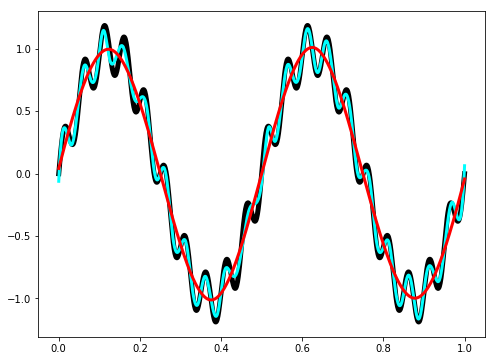

In [7]:
pyplot.plot(x, y, linewidth=5, color='black')
pyplot.plot(x, fine_interpolation(x), linewidth=3, color='cyan')
pyplot.plot(x, crude_interpolation(x), linewidth=3, color='red');

Decorating the plot
================

Add a legend
------------------

[In the plot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend)

or

[For the whole figure](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.figlegend)

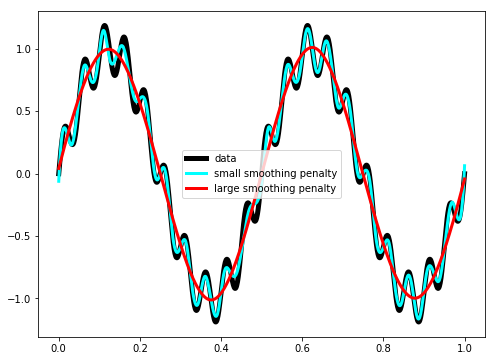

In [8]:
pyplot.plot(x, y, linewidth=5, color='black', label='data')
pyplot.plot(x,
            fine_interpolation(x),
            linewidth=3,
            color='cyan',
            label='small smoothing penalty')
pyplot.plot(x,
            crude_interpolation(x),
            linewidth=3,
            color='red',
            label='large smoothing penalty')
pyplot.legend();

UGH!!!

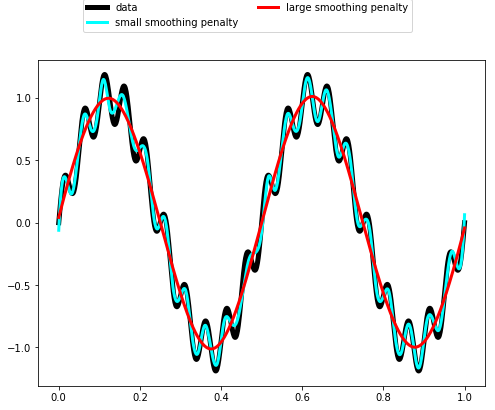

In [9]:
pyplot.plot(x, y, linewidth=5, color='black', label='data')
pyplot.plot(x,
            fine_interpolation(x),
            linewidth=3,
            color='cyan',
            label='small smoothing penalty')
pyplot.plot(x,
            crude_interpolation(x),
            linewidth=3,
            color='red',
            label='large smoothing penalty')
pyplot.figlegend(ncol=2,
                 loc='upper center',
                 borderaxespad=-0.1);

Some fun with interpolations
========================

Roots
--------

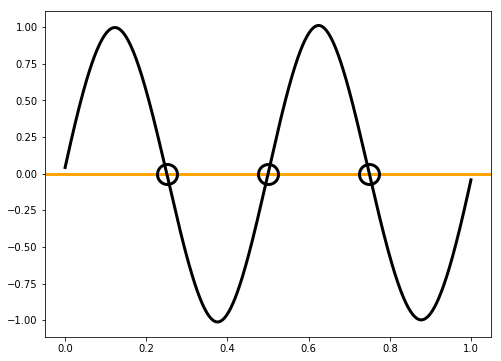

In [10]:
zeros = crude_interpolation.roots()
pyplot.axhline(0, linewidth=3, color='orange')
pyplot.plot(x, crude_interpolation(x), color='black', linewidth=3)
pyplot.plot(zeros,
            scipy.zeros(zeros.shape),
            'ok',
            markersize=20,
            markerfacecolor='none',
            markeredgewidth=3);

Derivatives and integrals
-----------------------------------

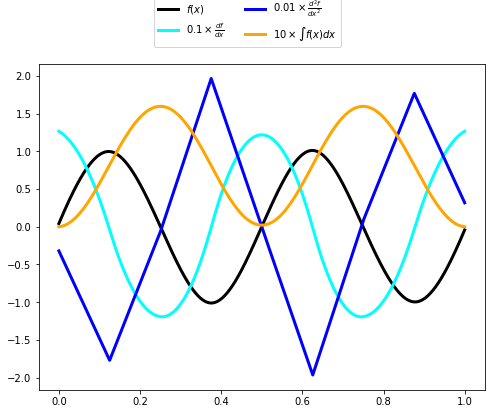

In [11]:
pyplot.plot(x,
            crude_interpolation(x),
            color='black',
            linewidth=3,
            label='$f(x)$')
derivatives = {i: crude_interpolation.derivative(i) for i in [1, 2]}
integral = crude_interpolation.antiderivative(1)
pyplot.plot(x,
            0.1 * derivatives[1](x),
            color='cyan',
            linewidth=3,
            label='$0.1\\times\\frac{d f}{dx}$')
pyplot.plot(x,
            0.01 * derivatives[2](x),
            color='blue',
            linewidth=3,
            label='$0.01\\times\\frac{d^2 f}{dx^2}$')
pyplot.plot(x,
            10.0 * integral(x),
            color='orange',
            linewidth=3,
            label='$10\\times\\int f(x) dx$')
pyplot.figlegend(loc='upper center',
                 ncol=2,
                 borderaxespad=-0.5);

Increase font, add axis labels, move legent to the right

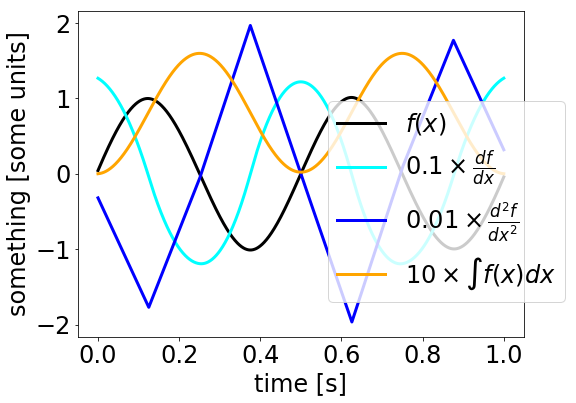

In [12]:
import matplotlib

matplotlib.rc('font', size=24)

pyplot.plot(x,
            crude_interpolation(x),
            color='black',
            linewidth=3,
            label='$f(x)$')
derivatives = {i: crude_interpolation.derivative(i) for i in [1, 2]}
integral = crude_interpolation.antiderivative(1)
pyplot.plot(x,
            0.1 * derivatives[1](x),
            color='cyan',
            linewidth=3,
            label='$0.1\\times\\frac{d f}{dx}$')
pyplot.plot(x,

            0.01 * derivatives[2](x),
            color='blue',
            linewidth=3,
            label='$0.01\\times\\frac{d^2 f}{dx^2}$')
pyplot.plot(x,
            10.0 * integral(x),
            color='orange',
            linewidth=3,
            label='$10\\times\\int f(x) dx$')

pyplot.figlegend(loc='center right',
                 ncol=1);

pyplot.xlabel('time [s]');
pyplot.ylabel('something [some units]');

In [13]:
matplotlib.rc('figure.subplot', right=0.7)
matplotlib.rc('figure', figsize=(12, 6))

[See the documentation for the RC parameters](https://matplotlib.org/users/customizing.html#matplotlib-rcparams)

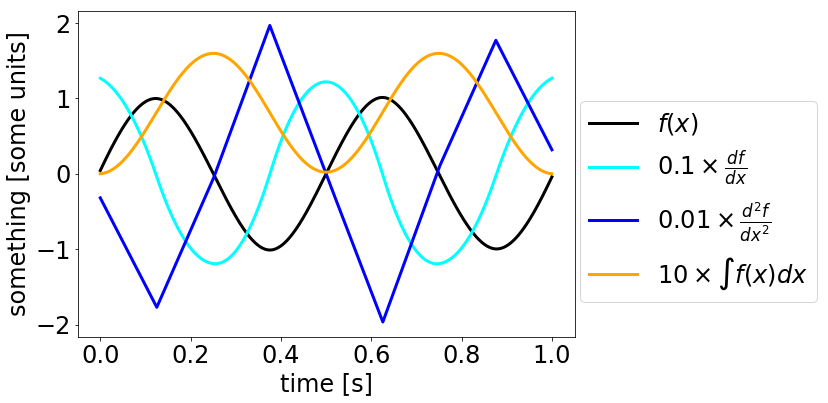

In [14]:
pyplot.plot(x,
            crude_interpolation(x),
            color='black',
            linewidth=3,
            label='$f(x)$')
derivatives = {i: crude_interpolation.derivative(i) for i in [1, 2]}
integral = crude_interpolation.antiderivative(1)
pyplot.plot(x,
            0.1 * derivatives[1](x),
            color='cyan',
            linewidth=3,
            label='$0.1\\times\\frac{d f}{dx}$')
pyplot.plot(x,

            0.01 * derivatives[2](x),
            color='blue',
            linewidth=3,
            label='$0.01\\times\\frac{d^2 f}{dx^2}$')
pyplot.plot(x,
            10.0 * integral(x),
            color='orange',
            linewidth=3,
            label='$10\\times\\int f(x) dx$')
pyplot.figlegend(loc='center right',
                 ncol=1);

pyplot.xlabel('time [s]');
pyplot.ylabel('something [some units]');

Your Turn
========

  * Create input data that follows $f(x) = 5 x^2 + 3 x + 1 + \mathcal{N}(\mu=0, \sigma=0.1)$

  * Evaluate at 100 positions uniformly distributed between x=0 and x=10
  
  * Use smoothing splines to approximate the noiseless curve.
  
  * Plot the data and the fit.
  
  * **Extra Credit:** make a two-panel plot showing the above in one of the panels and the residuals (i.e. data minus fit) in the other.
  
You will find the `scipy.random` module (https://docs.scipy.org/doc/numpy/reference/routines.random.html) useful. In particular the `randn` and `random` functions.


